C:\Users\leoeg\AppData\Local\Temp\ipykernel_29616\223444180.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = model.pvalues[1]  # p-value of the predictor
C:\Users\leoeg\AppData\Local\Temp\ipykernel_29616\223444180.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = model.pvalues[1]  # p-value of the predictor
C:\Users\leoeg\AppData\Local\Temp\ipykernel_29616\223444180.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[p

  model   p_value
0    x3  0.055657
1    x1  0.091392
2    x7  0.363214
3    x2  0.661633
4   x10  0.711826
5    x4  0.742013
6    x9  0.804043
7    x5  0.827840
8    x8  0.891037
9    x6  0.990162


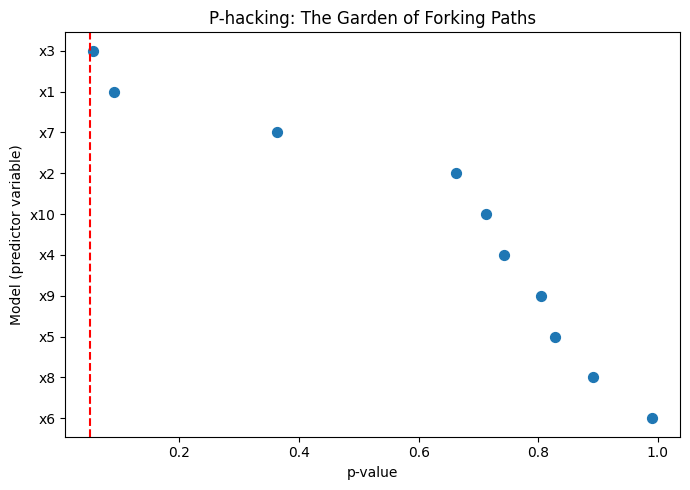


No significant results this time — unlucky p-hacker!


In [2]:
# ------------------------------
# p-hacking / garden of forking paths demo
# ------------------------------

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. Generate fake data
np.random.seed(124)
n = 100
df = pd.DataFrame({
    f"x{i}": np.random.normal(size=n) for i in range(1, 11)
})
df["y"] = np.random.normal(size=n)

# 2. Try many different models (forking paths)
results = []

y = df["y"]
for var in df.columns[:-1]:  # all x1..x10
    X = sm.add_constant(df[var])
    model = sm.OLS(y, X).fit()
    pval = model.pvalues[1]  # p-value of the predictor
    results.append({"model": var, "p_value": pval})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values("p_value").reset_index(drop=True)
print(results_df)

# 3. Visualize
plt.figure(figsize=(7,5))
plt.scatter(results_df["p_value"], results_df["model"], s=50)
plt.axvline(0.05, color="red", linestyle="dashed")
plt.xlabel("p-value")
plt.ylabel("Model (predictor variable)")
plt.title("P-hacking: The Garden of Forking Paths")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4. Optional: highlight "success"
signif_models = results_df[results_df["p_value"] < 0.05]
if not signif_models.empty:
    print(f"\nAha! We found something 'significant': {signif_models.iloc[0]['model']}, "
          f"p = {signif_models.iloc[0]['p_value']:.3f}")
    print("...except it’s completely random.")
else:
    print("\nNo significant results this time — unlucky p-hacker!")
